In [1]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%config InlineBackend.figure_format = 'svg'

Using TensorFlow backend.


In [3]:
# split the training and testing data into X (image) and Y (label) arrays

train_df = pd.read_csv(r'C:\Users\magic\Downloads\data\fashion-mnist_train.csv')
test_df = pd.read_csv(r'C:\Users\magic\Downloads\data\fashion-mnist_test.csv')

train_data = np.array(train_df, dtype='float32')
test_data = np.array(test_df, dtype='float32')

x_train = train_data[:, 1:] / 255
y_train = train_data[:, 0]

x_test = test_data[:, 1:] / 255
y_test = test_data[:, 0]

x_train, x_validate, y_train, y_validate = train_test_split(
    x_train, y_train, test_size=0.2, random_state=12345,
)

In [4]:
# reshape the data

im_rows = 28
im_cols = 28
batch_size = 512
im_shape = (im_rows, im_cols, 1)

x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_validate = x_validate.reshape(x_validate.shape[0], *im_shape)

In [5]:
# our 3 models 

name = '1_Layer'
cnn_model_1 = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape=im_shape, name='Conv2D-1'),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.2, name='Dropout'),
    Flatten(name='flatten'),
    Dense(32, activation='relu', name='Dense'),
    Dense(10, activation='softmax', name='Output')
], name=name)

name = '2_Layer'
cnn_model_2 = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape=im_shape, name='Conv2D-1'),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.2, name='Dropout-1'),
    Conv2D(64, kernel_size=3, activation='relu', name='Conv2D-2'),
    Dropout(0.25, name='Dropout-2'),
    Flatten(name='flatten'),
    Dense(64, activation='relu', name='Dense'),
    Dense(10, activation='softmax', name='Output')
], name=name)

name='3_layer'
cnn_model_3 = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', 
           input_shape=im_shape, kernel_initializer='he_normal', name='Conv2D-1'),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.25, name='Dropout-1'),
    Conv2D(64, kernel_size=3, activation='relu', name='Conv2D-2'),
    Dropout(0.25, name='Dropout-2'),
    Conv2D(128, kernel_size=3, activation='relu', name='Conv2D-3'),
    Dropout(0.4, name='Dropout-3'),
    Flatten(name='flatten'),
    Dense(128, activation='relu', name='Dense'),
    Dropout(0.4, name='Dropout'),
    Dense(10, activation='softmax', name='Output')
], name=name)

cnn_models = [cnn_model_1, cnn_model_2, cnn_model_3]

In [6]:
for model in cnn_models:
    model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D-1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
MaxPool (MaxPooling2D)       (None, 13, 13, 32)        0         
_________________________________________________________________
Dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
Dense (Dense)                (None, 32)                173088    
_________________________________________________________________
Output (Dense)               (None, 10)                330       
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
_________________________________________________________________
____

In [7]:
# train the models and save results to a dict

history_dict = {}

for model in cnn_models:
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=Adam(),
        metrics=['accuracy']
    )
    
    history = model.fit(
        x_train, y_train,
        batch_size=batch_size,
        epochs=50, verbose=1,
        validation_data=(x_validate, y_validate)
    )
    
    history_dict[model.name] = history

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 24s 498us/step - loss: 0.7922 - acc: 0.7378 - val_loss: 0.4875 - val_acc: 0.8278
Epoch 2/50
48000/48000 [==============================] - 24s 507us/step - loss: 0.4419 - acc: 0.8441 - val_loss: 0.3949 - val_acc: 0.8642
Epoch 3/50
48000/48000 [==============================] - 24s 508us/step - loss: 0.3865 - acc: 0.8643 - val_loss: 0.3639 - val_acc: 0.8737
Epoch 4/50
48000/48000 [==============================] - 24s 493us/step - loss: 0.3562 - acc: 0.8753 - val_loss: 0.3397 - val_acc: 0.8826
Epoch 5/50
48000/48000 [==============================] - 23s 473us/step - loss: 0.3346 - acc: 0.8812 - val_loss: 0.3224 - val_acc: 0.8881
Epoch 6/50
48000/48000 [==============================] - 24s 509us/step - loss: 0.3192 - acc: 0.8870 - val_loss: 0.3127 - val_acc: 0.8895
Epoch 7/50
48000/48000 [==============================] - 24s 500us/step - loss: 0.3055 - acc: 0.8916 - val_loss: 0.

Epoch 9/50
48000/48000 [==============================] - 29s 606us/step - loss: 0.2585 - acc: 0.9073 - val_loss: 0.2616 - val_acc: 0.9038
Epoch 10/50
48000/48000 [==============================] - 29s 606us/step - loss: 0.2522 - acc: 0.9092 - val_loss: 0.2565 - val_acc: 0.9076
Epoch 11/50
48000/48000 [==============================] - 29s 599us/step - loss: 0.2382 - acc: 0.9134 - val_loss: 0.2384 - val_acc: 0.9137
Epoch 12/50
48000/48000 [==============================] - 28s 589us/step - loss: 0.2268 - acc: 0.9186 - val_loss: 0.2341 - val_acc: 0.9153
Epoch 13/50
48000/48000 [==============================] - 28s 587us/step - loss: 0.2189 - acc: 0.9203 - val_loss: 0.2407 - val_acc: 0.9102
Epoch 14/50
48000/48000 [==============================] - 29s 598us/step - loss: 0.2144 - acc: 0.9218 - val_loss: 0.2259 - val_acc: 0.9174
Epoch 15/50
48000/48000 [==============================] - 29s 612us/step - loss: 0.2052 - acc: 0.9267 - val_loss: 0.2233 - val_acc: 0.9174
Epoch 16/50
48000/480

48000/48000 [==============================] - 60s 1ms/step - loss: 0.2153 - acc: 0.9198 - val_loss: 0.2072 - val_acc: 0.9228
Epoch 18/50
48000/48000 [==============================] - 60s 1ms/step - loss: 0.2083 - acc: 0.9231 - val_loss: 0.2097 - val_acc: 0.9229
Epoch 19/50
48000/48000 [==============================] - 60s 1ms/step - loss: 0.1990 - acc: 0.9258 - val_loss: 0.2023 - val_acc: 0.9256
Epoch 20/50
48000/48000 [==============================] - 60s 1ms/step - loss: 0.1934 - acc: 0.9280 - val_loss: 0.2025 - val_acc: 0.9236
Epoch 21/50
48000/48000 [==============================] - 60s 1ms/step - loss: 0.1915 - acc: 0.9292 - val_loss: 0.2089 - val_acc: 0.9218
Epoch 22/50
48000/48000 [==============================] - 60s 1ms/step - loss: 0.1891 - acc: 0.9297 - val_loss: 0.2082 - val_acc: 0.9242
Epoch 23/50
48000/48000 [==============================] - 60s 1ms/step - loss: 0.1827 - acc: 0.9321 - val_loss: 0.2024 - val_acc: 0.9256
Epoch 24/50
48000/48000 [=====================

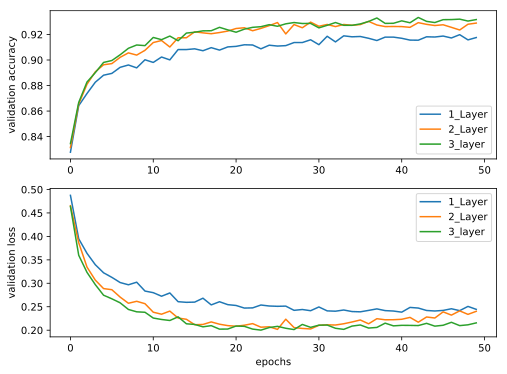

In [9]:
# plot the accuracy and loss

fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

for history in history_dict:
    val_acc = history_dict[history].history['val_acc']
    val_loss = history_dict[history].history['val_loss']
    ax1.plot(val_acc, label=history)
    ax2.plot(val_loss, label=history)
    
ax1.set_ylabel('validation accuracy')
ax2.set_ylabel('validation loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend()
plt.show()